In [46]:
## Code to extract data from Matera experiment - vertical geophones

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import obspy
import scipy


In [47]:
# opening the files and extracing the data from the .txt file
file = open("/Users/annamaria/PhD/Data/Matera/20200214_Line1_Matera/23_23_10_2019_12_15_00_004.txt_line1",'r')
data = []
empt = 0
for line in file:
    rows = line.split()
    if not rows:
        continue
    else:
        #print(line)
        #print('STOP')
        #rows = line.split()
        #print(rows)
        data.append(rows)
   

In [26]:
# transforming data into floats
data_set = np.zeros(len(data))
for i in range(len(data)):
    b = [float(s) for s in data[i]]
    #print(type(b))
    data_set[i] = float(b[0])
np.shape(data_set)

(901120,)

In [19]:
# parameters definition
nb_sens = 20 #number of sensors
sig_len = (len(data_set))//nb_sens #signal length

# defining the matrix where sensor info will go:
mat_signal = np.zeros((sig_len,nb_sens))
np.shape(mat_signal)

(45056, 20)

In [21]:
# creating a matrix with data from each sensor

value = 0
for column in range(nb_sens):
    row = 0
    while row < sig_len:
        adding = data_set[value]   
        mat_signal[row, column] = adding
        row += 1
        value += 1
    print("row",row,"column",column)   


row 45056 column 0
row 45056 column 1
row 45056 column 2
row 45056 column 3
row 45056 column 4
row 45056 column 5
row 45056 column 6
row 45056 column 7
row 45056 column 8
row 45056 column 9
row 45056 column 10
row 45056 column 11
row 45056 column 12
row 45056 column 13
row 45056 column 14
row 45056 column 15
row 45056 column 16
row 45056 column 17
row 45056 column 18
row 45056 column 19


<Figure size 432x288 with 0 Axes>

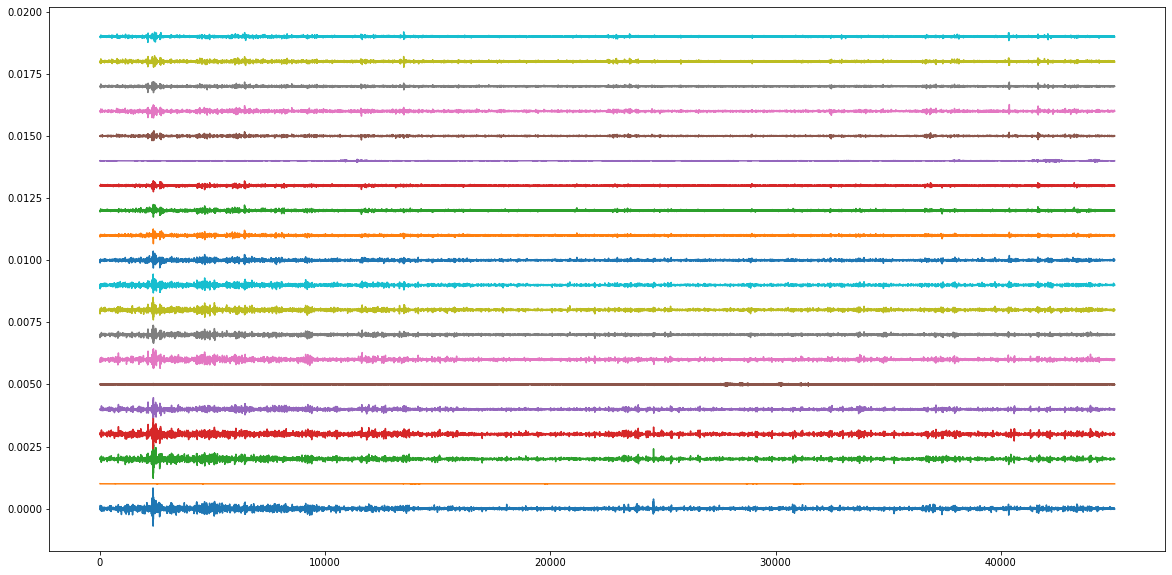

In [24]:
# plotting the signals from each sensor

plt.figure()
plt.figure(figsize=(20,10))
for column in range(nb_sens):
    plt.plot(mat_signal[:,column]+0.001*column)    

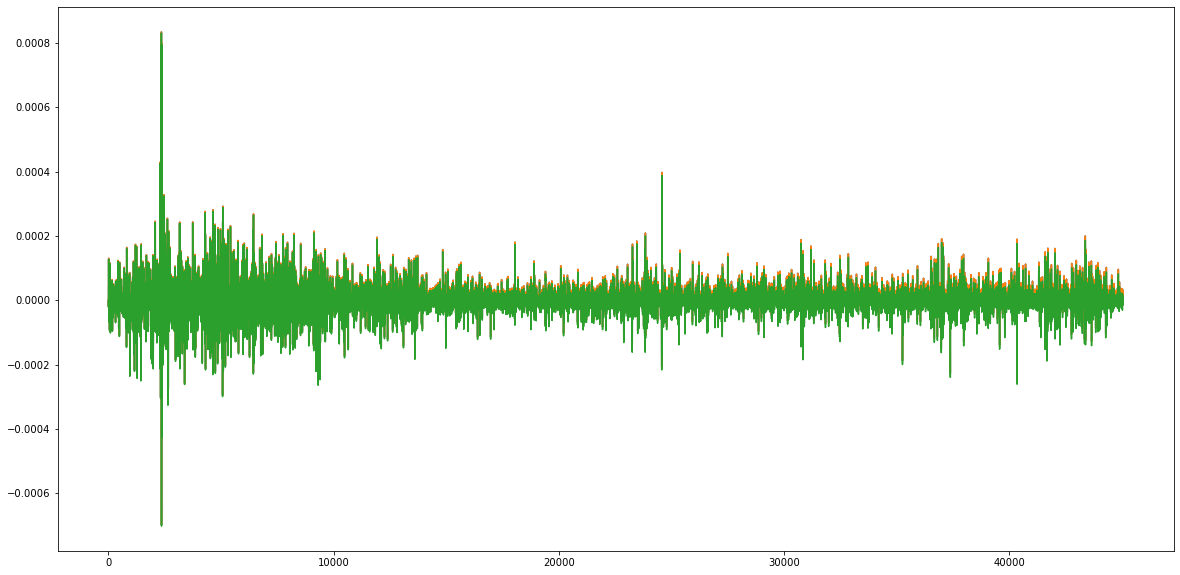

In [48]:
# removing trend and mean


cccc = mat_signal[:,0]
bbb = obspy.signal.detrend.simple(cccc)

ddd = scipy.signal.detrend(bbb)

plt.figure(figsize=(20,10))

plt.plot(bbb)
plt.plot(cccc)
plt.plot(ddd)
plt.show()

In [28]:
from obspy import read

tr = read()[0]

tr.detrend("spline", order=3, dspline=500)

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples

In [29]:
type(tr)

obspy.core.trace.Trace